## MedReg-Scraping 2020 V2

Der folgende Code wurde für das erste Scraping der MedReg-Datenbank im November 2019 erstellt. Es hat sich damals gezeigt, dass die Abfrage auch ohne Intervall durchfüht werden kann. Zuerst habe mit einem Zufalls-Intervall von 5-10 Sekunden pro Anfrage gearbeitet. Dabei wurde ich regelmässig nach einigen hundert Downloads blockiert. Mit der Except-Schlaufe und einem time.sleep von 3 Minuten schaffte ich es immerhin, dass das Programm selbstständig weiterlief. Doch für rund 3000 Datensätze lief das Programm rund 14 Stunden. Die Abfrage von 150'000 Seiten hätte demnach 29 Tage gedauert. Der Versuch, die einzelnen Abfragen im Eiltempo, ohne Zufalls-Intervall durchzuführen, brachte dann eine befriedende Geschwindigkeit.

Bei einem erneuten Scraping Anfang Januar 2020 wurden nicht alle Datensätze korrekt heruntergeladen ([Notebook hier](//Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/python_deleted_code/02_MedReg_Scraping_2020.ipynb)). Ein Vergleich mit den Datensätzen vom ersten Scraping und dem erneuten Scraping mit der Inhaltssuche von MacOS hat ergeben, dass beim erneuten Scraping von verschiedenen Fachrichtungen deutlich weniger Datensätze vorhanden sind. 


Also muss das Scraping noch einmal wiederholt werden, um an die aktuellesten Daten bis Ende 2019 zu kommen. So sieht es im MedReg am 14. Januar aus:

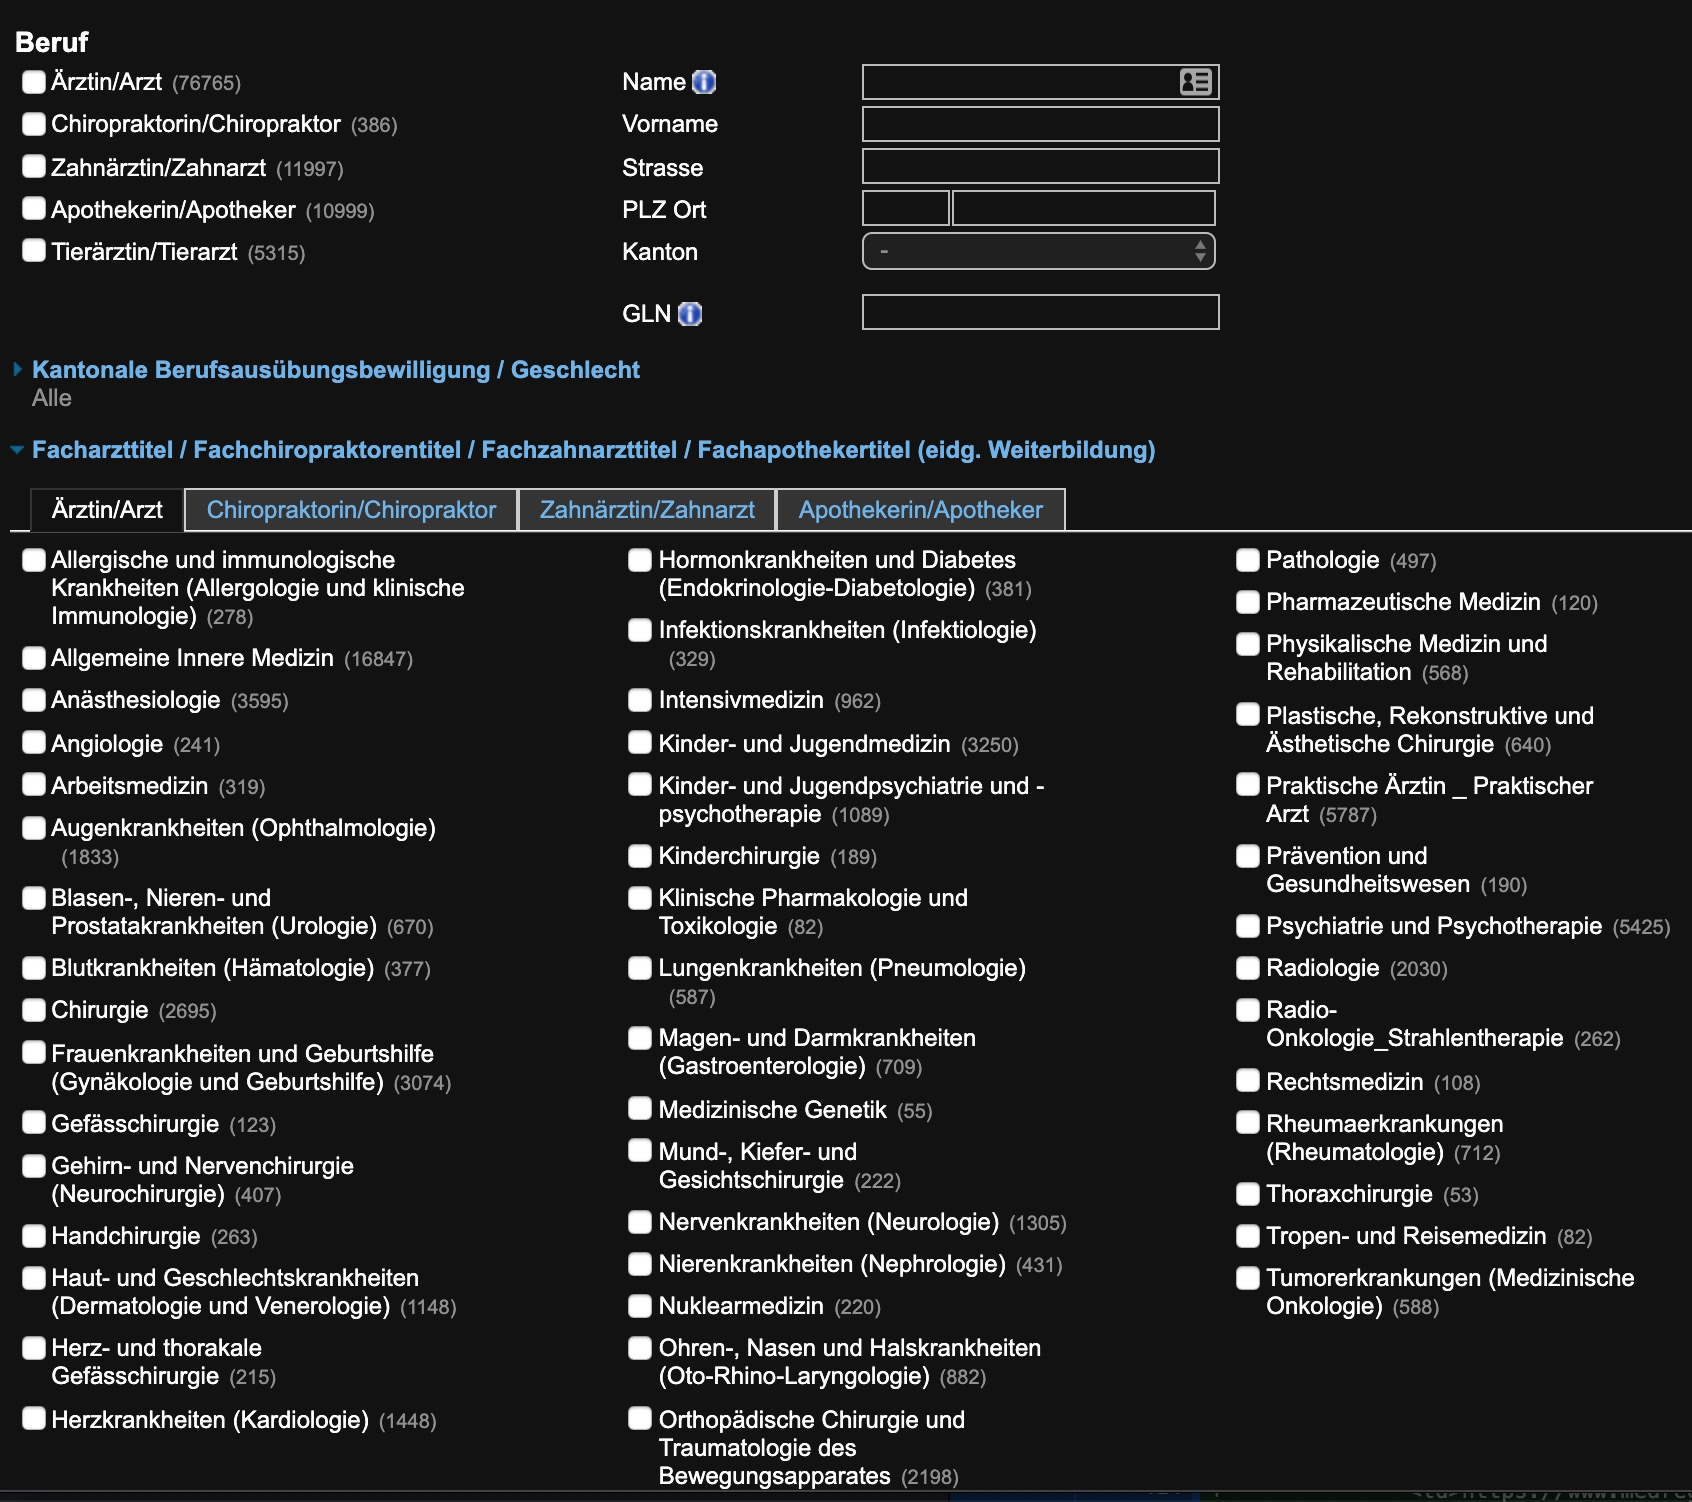

Zudem ist wird durch die Scraping-Pause auch immer mindestens ein File ausgelassen. Dieser Fehler soll mithilfe des Protokolls und einer Funktion, der die fehlenden URL's nachlädt korrigiert werden, um sicher zu sein, alle vorhanden Datensätze per Ende 2019 bzw. dem 15. Januar runtergeladen zu haben. Die Abfrage wird zudem auf 115'000 Files beschränkt, da es sich gezeigt hat, dass darüber keine Datensätze mehr vorhanden sind. 


In [4]:
import requests
import random
import time
import csv
from time import sleep

url_stamm = "https://www.medregom.admin.ch/DE/Detail/Detail?pid="
output_path = "/Users/master/Downloads/medreg_2020/"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}

#Loop für das Erstellen und Abfragen der URL:
for url_id in range(#200,115000): #sicherheitshalber ausgekreuzt
    url_req = url_stamm + str(url_id) 
    #erstellt die Abfrage-URL für die Datensätze im range(x,y)
    try:
        r = requests.get(url_req, headers = headers, timeout=20)
        #timout von 5 auf 20 Sekunden erhöht

        with open(output_path + "medreg_" + str(url_id) + ".html", 'w', encoding = 'utf-8') as f:
            f.write(r.text)
            f.close()

            protokoll = [[url_id, url_req, r.status_code]]
            #neu wird die uld_id ins Protokoll geschrieben, um 
            #später besser die übersprungenen Webseiten auslesen zu können (Re-Scraping)

        with open(output_path + "scrape2020_115K_protokoll.csv", 'a') as p:
            writer = csv.writer(p, dialect = 'excel')
            writer.writerows(protokoll)
            
        sleep(random.uniform(0, 1))
        #diese Funktion wurde beim ersten Scraping deaktiviert, um die Abfrage möglichst kurz zu halten
        
        #mit dieser Funktion nimmt der Scraper den Dienst wieder auf, nachdem der Zugriff temporär gesperrt wird:
    except: 
        r = requests.exceptions.ConnectionError
        print(url_req, 'Scraping paused')
        time.sleep(120)
        
        continue

https://www.medregom.admin.ch/DE/Detail/Detail?pid=52282 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=60341 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=69204 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=70759 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=78807 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=87079 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=94705 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=97614 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=99316 Scraping paused
https://www.medregom.admin.ch/DE/Detail/Detail?pid=106692 Scraping paused


Das erneute Scraping wurde in drei Schritten durchgeführt und dauerte vom 14.1. 01:29 bis 15.1. 16:15. Dabei wurden 114'784 Dateien herunter geladen. Mit einem Re-Scraping sollen jetzt noch die übersprungenen Dateien nachgeladen werden. 

Dafür wird folgender Code ausgeführt, der am 13. und 14.1. entwickelt wurde (Notebook *Scraping Create Re-Scrape Function*):

In [9]:
import csv

missed_range = []
#missed_ids = []
#nach dem ersten Durchgang deaktiviert um die Werte nicht zu überschreiben.

with open('/Users/master/Downloads/medreg_scraping_protokoll/scrape2020_115K_protokoll.csv', newline='') as csvfile:
    protokoll = csv.reader(csvfile, delimiter=',')
    
    last = int(next(protokoll)[0])
    for row in protokoll:
        data = int(row[0])
        if data - last > 1:
            missed_range.append((last,data))
        last = data

print(missed_range)


for row in missed_range:
    for i in range(row[0]+1,row[1]):
        missed_ids.append(i)
        
print(missed_ids)

[(52281, 52283), (60340, 60342), (69203, 69205), (70758, 70760), (78806, 78808), (87078, 87080), (94704, 94706), (97613, 97615), (99315, 99317), (106691, 106693)]
[3253, 9858, 17742, 17743, 23821, 28775, 35525, 42448, 49861, 52282, 60341, 69204, 70759, 78807, 87079, 94705, 97614, 99316, 106692]


Da ich das Scraping in drei Stufen durchgeführt habe und dafür jetzt auch drei Protokoll-Dateien vorliegen, lasse ich den Code einfach dreimal durchlaufen und baue so die Liste mit den fehlenden ID's. 

Jetzt lase ich die fehlenden ID's der Liste *missed_ids* mit einem leicht modifizierten Scrape-Code nochmals laufen und lade sie direkt in den Ordner mit den gescrapten Daten nach. 

In [11]:
missed_ids

[3253,
 9858,
 17742,
 17743,
 23821,
 28775,
 35525,
 42448,
 49861,
 52282,
 60341,
 69204,
 70759,
 78807,
 87079,
 94705,
 97614,
 99316,
 106692]

In [12]:
import requests
import random
import time
import csv
from time import sleep

url_stamm = "https://www.medregom.admin.ch/DE/Detail/Detail?pid="
output_path = "/Users/master/Downloads/medreg_2020/"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}

#Loop für das Erstellen und Abfragen der URL:
for url_id in missed_ids:
    url_req = url_stamm + str(url_id) 
    #erstellt die Abfrage-URL für die Datensätze im range(x,y)
    try:
        r = requests.get(url_req, headers = headers, timeout=20)
        
        with open(output_path + "medreg_" + str(url_id) + ".html", 'w', encoding = 'utf-8') as f:
            f.write(r.text)
            f.close()

            protokoll = [[url_id, url_req, r.status_code]]
            print(url_req, r.status_code)

        with open(output_path + "rescrape2020_protokoll.csv", 'a') as p:
            writer = csv.writer(p, dialect = 'excel')
            writer.writerows(protokoll)
            
        sleep(random.uniform(0, 1))
        #diese Funktion wurde beim ersten Scraping deaktiviert, um die Abfrage möglichst kurz zu halten
        
        #mit dieser Funktion nimmt der Scraper den Dienst wieder auf, nachdem der Zugriff temporär gesperrt wird:
    except: 
        r = requests.exceptions.ConnectionError
        print(url_req, 'Scraping paused')
        time.sleep(120)
        
        continue

https://www.medregom.admin.ch/DE/Detail/Detail?pid=3253 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=9858 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=17742 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=17743 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=23821 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=28775 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=35525 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=42448 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=49861 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=52282 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=60341 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=69204 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=70759 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=78807 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=87079 200
https://www.medregom.admin.ch/DE/Detail/Detail?pid=94705 200
https://www.medregom.admin

Voilà, alle fehlenden Dateien wurden nachgeladen! 114799 Files im Ordner, also komplett.

Noch ein Check der Fehlermeldungen in den Protokolldateien:

In [13]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('/Users/master/Downloads/medreg_scraping_protokoll/scrape2020_20K_protokoll.csv')
df.iloc[ : , 2 ].value_counts()

200    19234
500      561
Name: 500, dtype: int64

In [19]:
df = pd.read_csv('/Users/master/Downloads/medreg_scraping_protokoll/scrape2020_50K_protokoll.csv')
df.iloc[ : , 2 ].value_counts()

200    26726
500     3267
Name: 200, dtype: int64

In [20]:
df = pd.read_csv('/Users/master/Downloads/medreg_scraping_protokoll/scrape2020_115K_protokoll.csv')
df.iloc[ : , 2 ].value_counts()

200    62503
500     2486
Name: 200, dtype: int64

Ok, keine 400, 404-Codes. Wir haben also insgesamt:

- 108463 Einträge zurückerhalten mit Code 200
- 6314 mit Code 500

Aber leider wissen wir beim Error 500 nicht genau, was die Ursache war. Das Problem ist ja, dass nicht alle ID's einen Eintrag haben. Ruft der Scraper eine solche Seite auf, kommt ein Error 500 zurück. Allerdings könnte der Fehler 500 auch andere Ursachen haben.

Etwas beeunruhigend ist die Tatsache, dass eine Stichprobe der Files zwei unterschiedliche Dateien zeigte, die mit Code 500 registriert wurden. Dies soll im weiteren Notebook MedReg_Scraping 04 Data Check <MedReg_Scraping 04 Data Check> genauer untersucht werden. 